In [9]:


from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/0/0e/SimpleBayesNet.svg')

+-----+----------+
| C   |   phi(C) |
|-----+----------|
| C_0 |   0.1599 |
| C_1 |   0.8401 |
+-----+----------+
8414
[ 1.          1.          1.         ...,  0.84146829  0.84148415  0.8414    ]


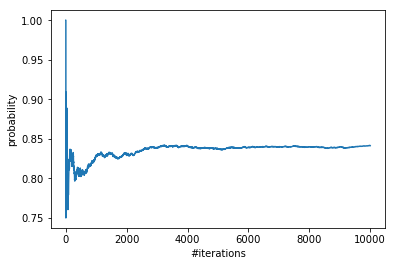

In [3]:
import numpy as np
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import State
from pgmpy.inference import VariableElimination
from pgmpy.sampling import BayesianModelSampling
import matplotlib.pyplot as plt
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

model = BayesianModel([('O', 'E'), ('T', 'E'), ('C', 'E'), ('C', 'H'), ('E', 'G'), ('H', 'G')])

# Defining individual CPDs.
cpd_t = TabularCPD(variable='T', variable_card=2, values=[[0.45, 0.55]])
cpd_c = TabularCPD(variable='C', variable_card=2, values=[[0.2, 0.8]])
cpd_o = TabularCPD(variable='O', variable_card=2, values=[[0.7, 0.3]])

# print(cpd_t)
# print(cpd_c)
# print(cpd_o)

cpd_e = TabularCPD(variable='E', variable_card=2, 
                   values=[[0.85, 0.8, 0.4,  0.3, 0.6, 0.5, 0.15, 0.1],
                           [0.15, 0.2, 0.6, 0.7, 0.4, 0.5, 0.85, 0.9]],
                  evidence=['T', 'C', 'O'],
                  evidence_card=[2, 2, 2])
# print(cpd_e)

cpd_h = TabularCPD(variable='H', variable_card=2, 
                   values=[[0.75, 0.2],
                           [0.25, 0.8]],
                   evidence=['C'],
                   evidence_card=[2])

cpd_g = TabularCPD(variable='G', variable_card=5,
                   values=[[0.05, 0.1, 0.1, 0.6],
                           [0.05, 0.3, 0.3, 0.2],
                           [0.1, 0.3, 0.3, 0.1],
                           [0.2, 0.2, 0.2, 0.05],
                           [0.6, 0.1, 0.1, 0.05]],
                   evidence=['E', 'H'],
                   evidence_card=[2, 2])

# print(cpd_h)
# print(cpd_g)

# Associating the CPDs with the network
model.add_cpds(cpd_t, cpd_c, cpd_o, cpd_e, cpd_h, cpd_g)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly 
# defined and sum to 1.
model.check_model()


infer = VariableElimination(model)
print(infer.query(['C'], evidence={'O': 1, 'G': 1}) ['C'])

inference = BayesianModelSampling(model)
evidence=[State(var='O', state=1), State(var='G', state=1)]
# samples = inference.rejection_sample(evidence, 100)
# print samples
samples = inference.rejection_sample(evidence, 10000, return_type="recarray")
samplelist = samples.tolist()

n = len(samplelist)
count = 0
prob = np.zeros(n)
for i in range(n):
    if (samplelist[i][2] == 1):
        count += 1
    prob[i] = float(count) / (i+1)    
print count
print prob

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('#iterations')
ax.set_ylabel('probability')
ax.plot(prob)

plt.legend()
plt.show()
